shape x:(185, 15) / y:(185,)
train_x.shape = (185, 15, 1)
train_y.shape = (185,)
Epoch 1/1000
6/6 [==============================] - 2s 4ms/step - loss: 0.3364
Epoch 2/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.2794
Epoch 3/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.2327
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1967
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1718
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1553
Epoch 7/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.1446
Epoch 8/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.1355
Epoch 9/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1278
Epoch 10/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.1218
Epoch 11/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1156
Epoch 12/1000
6/6 [=============================

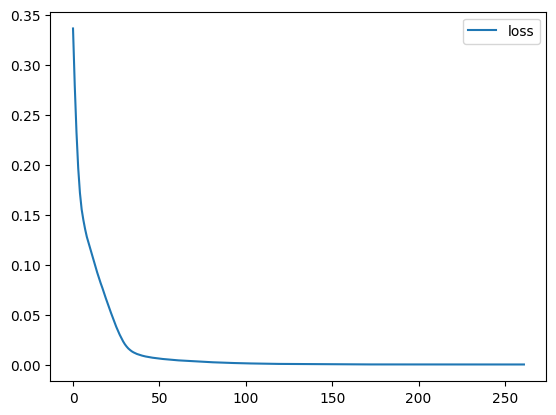

(100,) (1, 1) 0 15
(100,) (1, 1) 1 16
(100,) (1, 1) 2 17
(100,) (1, 1) 3 18
(100,) (1, 1) 4 19
(100,) (1, 1) 5 20
(100,) (1, 1) 6 21
(100,) (1, 1) 7 22
(100,) (1, 1) 8 23
(100,) (1, 1) 9 24
(100,) (1, 1) 10 25
(100,) (1, 1) 11 26
(100,) (1, 1) 12 27
(100,) (1, 1) 13 28
(100,) (1, 1) 14 29
(100,) (1, 1) 15 30
(100,) (1, 1) 16 31
(100,) (1, 1) 17 32
(100,) (1, 1) 18 33
(100,) (1, 1) 19 34
(100,) (1, 1) 20 35
(100,) (1, 1) 21 36
(100,) (1, 1) 22 37
(100,) (1, 1) 23 38
(100,) (1, 1) 24 39
(100,) (1, 1) 25 40
(100,) (1, 1) 26 41
(100,) (1, 1) 27 42
(100,) (1, 1) 28 43
(100,) (1, 1) 29 44
(100,) (1, 1) 30 45
(100,) (1, 1) 31 46
(100,) (1, 1) 32 47
(100,) (1, 1) 33 48
(100,) (1, 1) 34 49
(100,) (1, 1) 35 50
(100,) (1, 1) 36 51
(100,) (1, 1) 37 52
(100,) (1, 1) 38 53
(100,) (1, 1) 39 54
(100,) (1, 1) 40 55
(100,) (1, 1) 41 56
(100,) (1, 1) 42 57
(100,) (1, 1) 43 58
(100,) (1, 1) 44 59
(100,) (1, 1) 45 60
(100,) (1, 1) 46 61
(100,) (1, 1) 47 62
(100,) (1, 1) 48 63
(100,) (1, 1) 49 64
(100,) (1,

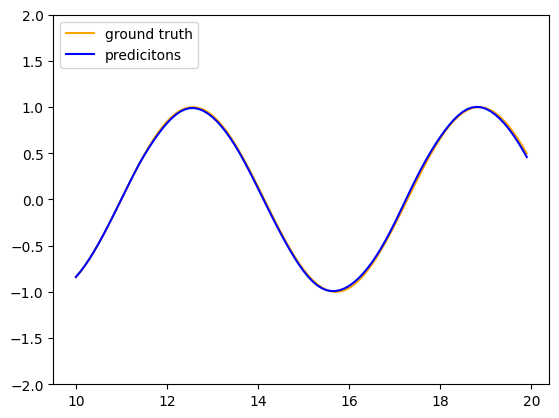

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM

# time step만큼 시퀀스 데이터 분리
def split_sequence(sequence, step):
    x, y = list(), list()

    for i in range(len(sequence)):
        end_idx = i + step
        if end_idx > len(sequence) - 1:
            break

        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        x.append(seq_x)
        y.append(seq_y)

    return np.array(x), np.array(y)


# sin 함수 학습 데이터
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
train_y = [np.sin(i) for i in x]

# 하이퍼파라미터
n_timesteps = 15
n_features = 1

# 시퀀스 나누기
# train_x.shape => (samples, timesteps)
# train_y.shape => (samples)
train_x, train_y = split_sequence(train_y, step=n_timesteps)
print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))

# RNN 입력 벡터 크기를 맞추기 위해 벡터 차원 크기 변경
# reshape from [samples, timesteps] into [samples, timesteps, features]
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(units=10, return_sequences=False, input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 모델 학습
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=5, mode='auto')
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

# loss 그래프 생성
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

# 테스트 데이터셋 생성
test_x = np.arange(10, 20, 0.1)
test_y = np.cos(test_x) # 테스트 정답 데이터

# RNN 모델 예측 및 로그 저장
pred_y = test_y[:n_timesteps]
#for i in range(len(test_x) - n_timesteps):
for i in range(len(test_x) - n_timesteps):
    #net_input = test_y[i : i + n_timesteps]
    net_input = pred_y[i : i + n_timesteps]
    net_input = net_input.reshape((1, n_timesteps, n_features))
    pred_run_y = model.predict(net_input, verbose=0)
    print(test_y.shape, pred_run_y.shape, i, i + n_timesteps)
    pred_y = np.append(pred_y, pred_run_y)

# 예측 결과 그래프 그리기
#plt.plot(test_x, calc_y, label="ground truth", color="orange")
#plt.plot(test_x, test_y, label="predicitons", color="blue")
plt.plot(test_x, test_y, label="ground truth", color="orange")
plt.plot(test_x, pred_y, label="predicitons", color="blue")
plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()

In [14]:
print(pred_y.shape)
print(test_y.shape)

print(test_x.shape)
print(test_y.shape)

(101,)
(100,)
(100,)
(100,)


shape x:(185, 15) / y:(185,)
train_x.shape = (185, 15, 1)
train_y.shape = (185,)
sgd ================================================================================
Epoch 1/1000
6/6 [==============================] - 1s 4ms/step - loss: 0.8794
Epoch 2/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.7518
Epoch 3/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.6439
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.5539
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.4768
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.4115
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.3563
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.3107
Epoch 9/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.2721
Epoch 10/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.2399
Epoch 11/1000
6/6 [========================

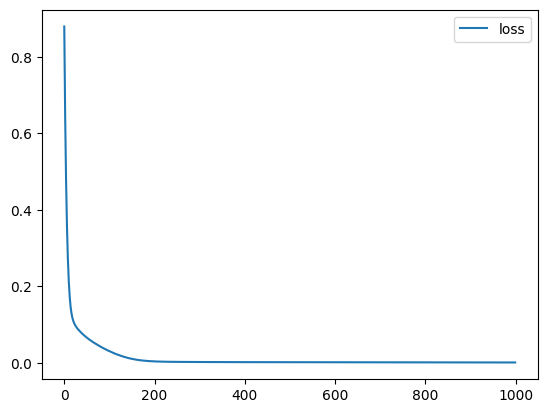

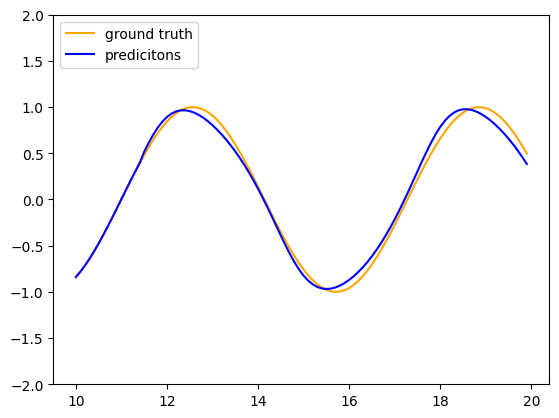

RMSprop ================================================================================
Epoch 1/1000
6/6 [==============================] - 2s 4ms/step - loss: 0.2731
Epoch 2/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2112
Epoch 3/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.1743
Epoch 4/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.1487
Epoch 5/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.1301
Epoch 6/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.1169
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1076
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0998
Epoch 9/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0925
Epoch 10/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0854
Epoch 11/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0782
Epoch 12/1000
6/6 [=====================

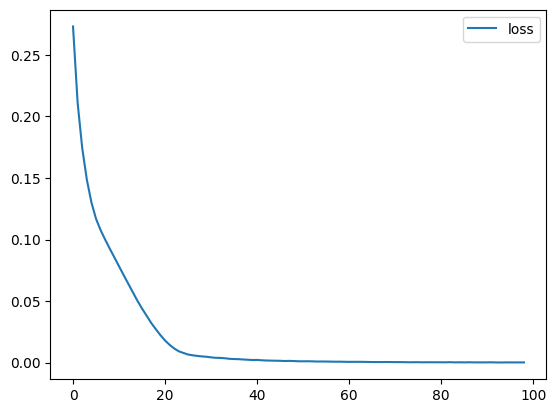

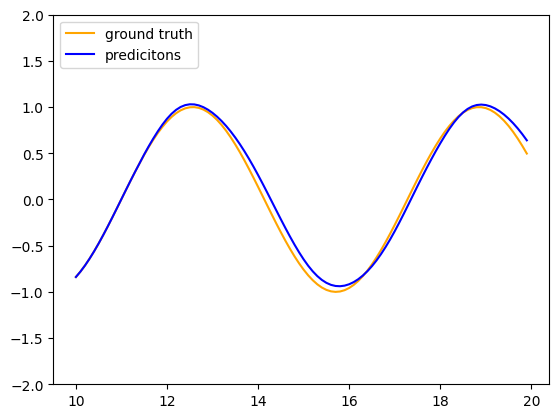

adadelta ================================================================================
Epoch 1/1000
6/6 [==============================] - 2s 4ms/step - loss: 1.0654
Epoch 2/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.0652
Epoch 3/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.0651
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.0650
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.0648
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.0647
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.0645
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.0644
Epoch 9/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.0642
Epoch 10/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.0641
Epoch 11/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.0639
Epoch 12/1000
6/6 [====================

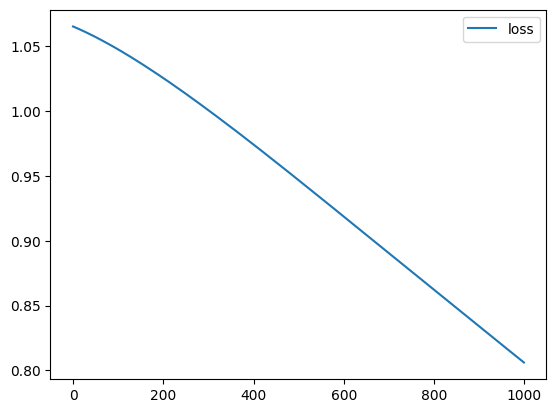

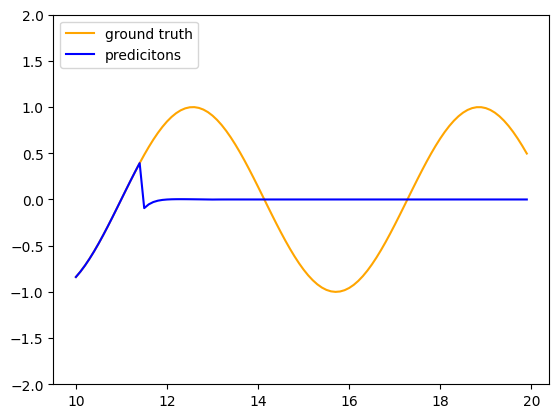

adam ================================================================================
Epoch 1/1000
6/6 [==============================] - 2s 4ms/step - loss: 0.5645
Epoch 2/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.5118
Epoch 3/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.4644
Epoch 4/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.4205
Epoch 5/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3798
Epoch 6/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3426
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.3083
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.2761
Epoch 9/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2462
Epoch 10/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.2200
Epoch 11/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1965
Epoch 12/1000
6/6 [========================

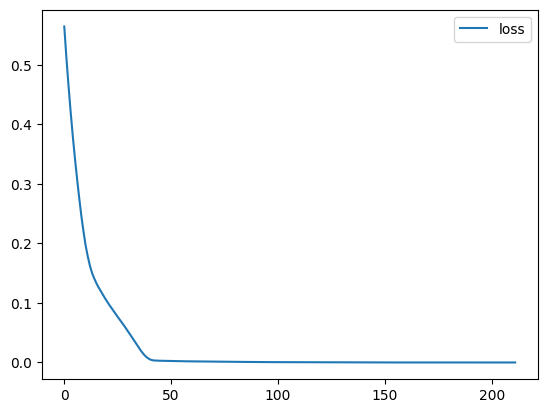

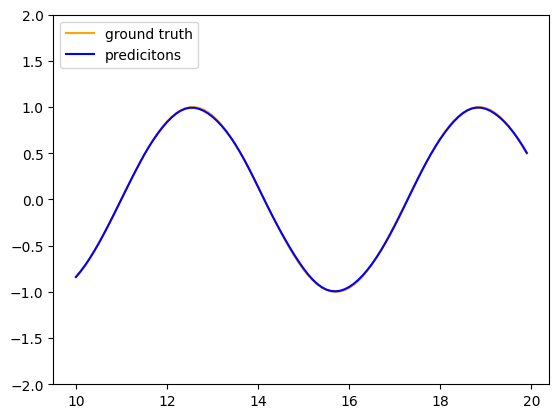

<Figure size 640x480 with 0 Axes>

In [18]:
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(1234)




import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM

# time step만큼 시퀀스 데이터 분리
def split_sequence(sequence, step):
    x, y = list(), list()

    for i in range(len(sequence)):
        end_idx = i + step
        if end_idx > len(sequence) - 1:
            break

        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        x.append(seq_x)
        y.append(seq_y)

    return np.array(x), np.array(y)


def sind_data_load():
    # sin 함수 학습 데이터
    x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
    train_y = [np.sin(i) for i in x]

    # 하이퍼파라미터
    n_timesteps = 15
    n_features = 1

    # 시퀀스 나누기
    # train_x.shape => (samples, timesteps)
    # train_y.shape => (samples)
    train_x, train_y = split_sequence(train_y, step=n_timesteps)
    print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))

    # RNN 입력 벡터 크기를 맞추기 위해 벡터 차원 크기 변경
    # reshape from [samples, timesteps] into [samples, timesteps, features]
    train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
    print("train_x.shape = {}".format(train_x.shape))
    print("train_y.shape = {}".format(train_y.shape))

    # 테스트 데이터셋 생성
    test_x = np.arange(10, 20, 0.1)
    test_y = np.cos(test_x) # 테스트 정답 데이터

    return train_x, train_y, test_x, test_y


def model_config(opt):
    # LSTM 모델 정의
    model = Sequential()
    model.add(LSTM(units=10, return_sequences=False, input_shape=(n_timesteps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer=opt, loss='mse')

    return model

def model_fit():
    # 모델 학습
    np.random.seed(0)
    from tensorflow.keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='loss', patience=5, mode='auto')
    history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

    return history


def model_predict(test_y):
    # RNN 모델 예측 및 로그 저장
    pred_y = test_y[:n_timesteps]
    #for i in range(len(test_x) - n_timesteps):
    for i in range(len(test_x) - n_timesteps):
        #net_input = test_y[i : i + n_timesteps]
        net_input = pred_y[i : i + n_timesteps]
        net_input = net_input.reshape((1, n_timesteps, n_features))
        pred_run_y = model.predict(net_input, verbose=0)
        print(test_y.shape, pred_run_y.shape, i, i + n_timesteps)
        pred_y = np.append(pred_y, pred_run_y)
    
    return pred_y


def plot_loss(history, plot_name):
    # loss 그래프 생성
    plt.plot(history.history['loss'], label="loss")
    plt.legend(loc="upper right")
    plt.show()
    plt.savefig(plot_name)


def plot_pred(test_x, test_y, pred_y, plot_name):
    # 예측 결과 그래프 그리기
    #plt.plot(test_x, calc_y, label="ground truth", color="orange")
    #plt.plot(test_x, test_y, label="predicitons", color="blue")
    plt.plot(test_x, test_y, label="ground truth", color="orange")
    plt.plot(test_x, pred_y, label="predicitons", color="blue")
    plt.legend(loc='upper left')
    plt.ylim(-2, 2)
    plt.show()
    plt.savefig(plot_name)


if __name__ == '__main__':

    # data load
    train_x, train_y, test_x, test_y = sind_data_load()

    # model config
    opt = ["sgd", "RMSprop","adadelta", "adam"]    
    name_head = "../MODL/lstm_opt_"
    plot_head = "../GIFD/lstm_opt_"

    for i in range(len(opt)):

        print(opt[i], "="*80)

        model_name = name_head + opt[i] + ".h5"
        plot_loss_name = plot_head +opt[i] + "loss"
        plot_pred_name = plot_head +opt[i] + "pred"

        model = model_config(opt[i])

        hist = model_fit()
        pred_y = model_predict(test_y)

        plot_loss(hist, plot_loss_name)
        plot_pred(test_x, test_y, pred_y, plot_pred_name)





In [36]:
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(1234)

import numpy as np
from random import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, TimeDistributed


# 시퀀스 생성
def get_sequence(n_timesteps):
    # 0~1 사이의 랜덤 시퀀스 생성
    X = np.array([random() for _ in range(n_timesteps)])

    # 클래스 분류 기준
    limit = n_timesteps / 4.0

    # 누적합 시퀀스에서 클래스 결정
    # 누적합 항목이 limit보다 작은 경우 0, 아닌 경우 1로 분류
    y = np.array([0 if x < limit else 1 for x in np.cumsum(X)])

    # LSTM 입력을 위해 3차원 텐서 형태로 변경
    X = X.reshape(1, n_timesteps, 1)
    y = y.reshape(1, n_timesteps, 1)
    return X, y


# 하이퍼파라미터 정의
n_units = 20
n_timesteps = 8

# 양방향 LSTM 모델 정의
model = Sequential()
model.add(Bidirectional(LSTM(n_units, return_sequences=True, input_shape=(n_timesteps, 1))))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
# 에포크마다 학습 데이터를 생성해서 학습
for epoch in range(1000):
#for epoch in range(10):
    X, y = get_sequence(n_timesteps)
    model.fit(X, y, epochs=1, batch_size=1, verbose=2)

# 모델 평가
X, y = get_sequence(n_timesteps)
#yhat = model.predict_classes(X, verbose=0)
yhat = (model.predict(X, verbose=0) >= 0.5).astype("int32")
#yhat = (model.predict(X, verbose=0)).astype("int32")
for i in range(n_timesteps):
    print('실젯값 :', y[0, i], '예측값 : ', yhat[0, i])
    

1/1 - 3s - loss: 0.6971 - accuracy: 0.2500 - 3s/epoch - 3s/step
1/1 - 0s - loss: 0.7104 - accuracy: 0.2500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6961 - accuracy: 0.6250 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6949 - accuracy: 0.6250 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.7027 - accuracy: 0.3750 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.7000 - accuracy: 0.3750 - 6ms/epoch - 6ms/step
1/1 - 0s - loss: 0.6918 - accuracy: 0.6250 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6977 - accuracy: 0.3750 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6892 - accuracy: 0.5000 - 6ms/epoch - 6ms/step
1/1 - 0s - loss: 0.6887 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6928 - accuracy: 0.5000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6853 - accuracy: 0.6250 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6817 - accuracy: 1.0000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6791 - accuracy: 0.8750 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6786 - accuracy: 0.8750 - 6ms/epoch - 6ms/step
1/1 - 0s - l

In [34]:
yhat

array([[[0],
        [1],
        [1],
        [1]]])